In [31]:
import xarray as xr
from winter_year import WinterYear

winter_year = WinterYear(2023, 2024)
stats_folder = '../output_folder/version_3/analyses/snow_cover_extent_cross_comparison'


Text(0.5, 1.0, 'Snow cover extent cross comparison for Winter Year 2023/2024 - binary - FSC > 0.0')

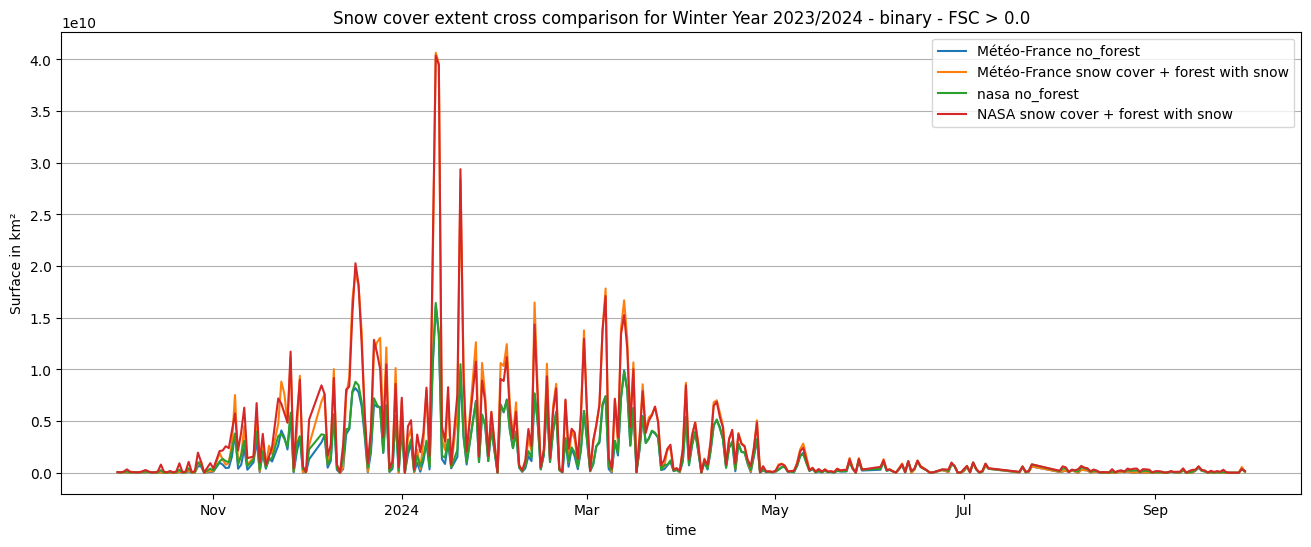

In [25]:
from matplotlib import pyplot as plt
from visualizations import plot_annual_daily_cross_sce
fsc_thresh = 0.0
file_name = f'sce_cross_comparison_WY_2023_2024_SNPP_meteofrance_nasa_l3_res_375m_fsc_thresh_{fsc_thresh}.nc'
stats_dataset = xr.open_dataset(f"{stats_folder}/{file_name}")

_, ax = plt.subplots(figsize=(16, 6))
mode='binary'
plot_annual_daily_cross_sce(area_stats=stats_dataset, ax=ax,mode=mode)
ax.set_ylabel("Surface in km²")
ax.set_title(f"Snow cover extent cross comparison for {str(winter_year)} - {mode} - FSC > {fsc_thresh}")

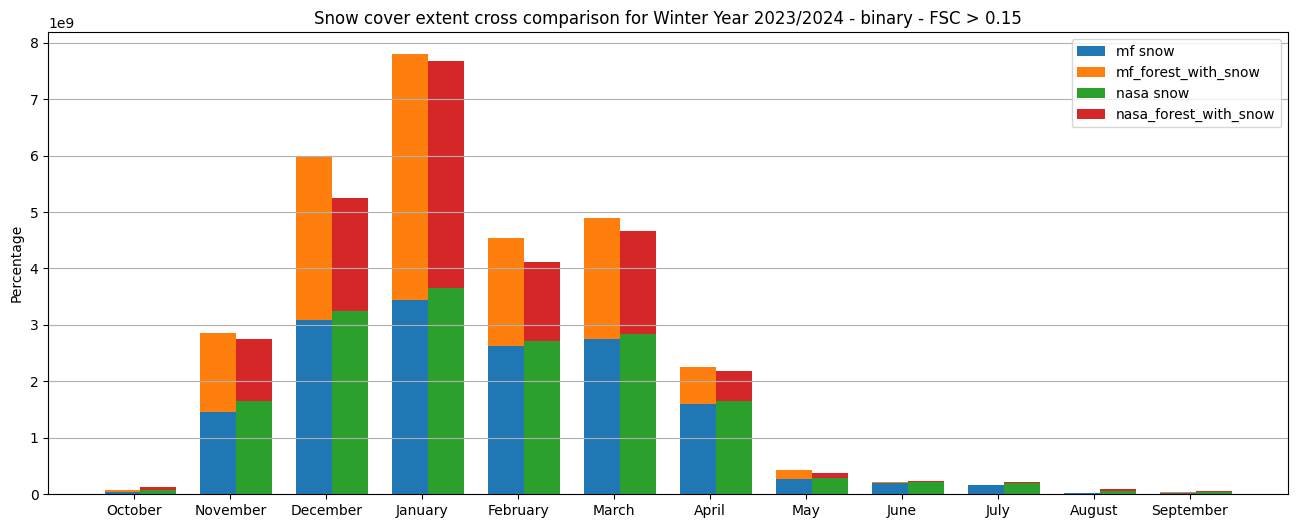

In [32]:
from visualizations import plot_multiple_stacked

fsc_thresh = 0.15
mode='binary'
file_name = f'sce_cross_comparison_WY_2023_2024_SNPP_meteofrance_nasa_l3_res_375m_fsc_thresh_{fsc_thresh}.nc'
stats_dataset = xr.open_dataset(f"{stats_folder}/{file_name}")

_, ax = plt.subplots(figsize=(16, 6))

monthly_avg = stats_dataset.resample({'time': "1ME"}).mean()
to_plot = [monthly_avg.data_vars['meteofrance'].sel(class_name=cn).to_pandas() for cn in [f'no_forest_{mode}', f'forest_{mode}']]
to_plot.extend([monthly_avg.data_vars['nasa'].sel(class_name=cn).to_pandas() for cn in [f'no_forest_{mode}', f'forest_{mode}']])
plot_multiple_stacked(data=to_plot,ax=ax,stacked=[False, True, False, True], 
                      labels=['mf snow', 'mf_forest_with_snow', 'nasa snow', 'nasa_forest_with_snow'],
                      colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'])
ax.set_ylabel("Surface in km²")
ax.set_title(f"Snow cover extent cross comparison for {str(winter_year)} - {mode} - FSC > {fsc_thresh}")
ax.set_xticklabels(to_plot[0].index.strftime("%B"))
ax.set_ylabel('Percentage')
ax.grid(True,axis='y')
ax.legend()